In [1]:
!pip install yfinance tensorflow scikit-learn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 16.4 MB/s eta 0:00:000:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.6 MB/s eta 0:00:00.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.4 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 1.8 MB/s eta 0:00:00.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.8 MB/s eta 0:00:00.0 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=22d9394891cec30ede3b6f2cb76ecb7d6287209d61bd8260ed383e5ee5070126
  Stored in directory: /home/7e9d92d3-38e0-4bb5-84fa-8f1a7099afae/

In [2]:
# Stock Price Prediction using LSTM

# Install required libraries (if not already installed)
# !pip install yfinance tensorflow scikit-learn matplotlib pandas

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# -------------------------
# 1. Download Stock Data
# -------------------------
# Example: Reliance Industries from NSE (2018-2023)
df = yf.download("RELIANCE.NS", start="2018-01-01", end="2023-12-31")
print(df.head())

# -------------------------
# 2. Preprocessing
# -------------------------
data = df.filter(['Close'])
dataset = data.values

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Training Data (80%)
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

train_data = scaled_data[0:int(training_data_len), :]

x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# -------------------------
# 3. Build LSTM Model
# -------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)

# -------------------------
# 4. Testing Data
# -------------------------
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# -------------------------
# 5. Visualization
# -------------------------
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('Stock Price Prediction using LSTM')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close']], label='Actual Price')
plt.plot(valid[['Predictions']], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


2025-09-14 16:46:26.823869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-14 16:46:28.884213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-14 16:46:34.604967: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/tmp/ipykernel_309/1543475881.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2018-01-01  401.864807  407.585208  400.870911  407.585208     9453202
2018-01-02  402.483215  406.193768  400.384994  403.300424     9499419
2018-01-03  404.095581  409.042975  403.322544  408.601227    13507800
2018-01-04  406.525055  407.187662  404.493091  405.575331     9008932
2018-01-05  407.828186  409.440517  406.503001  407.187694     7441284


ValueError: Found array with 0 feature(s) (shape=(1481, 0)) while a minimum of 1 is required by MinMaxScaler.

/tmp/ipykernel_309/4052792821.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed
2025-09-14 16:49:41.584744: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/7e9d92d3-38e0-4bb5-84fa-8f1a7099afae/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Columns in dataset: MultiIndex([( 'Close', 'RELIANCE.NS'),
            (  'High', 'RELIANCE.NS'),
            (   'Low', 'RELIANCE.NS'),
            (  'Open', 'RELIANCE.NS'),
            ('Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])
Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0494
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0051
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0048
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0045
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0035
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0036
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0033
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0031
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0032
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0030
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/tmp/ipykernel_309/4052792821.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


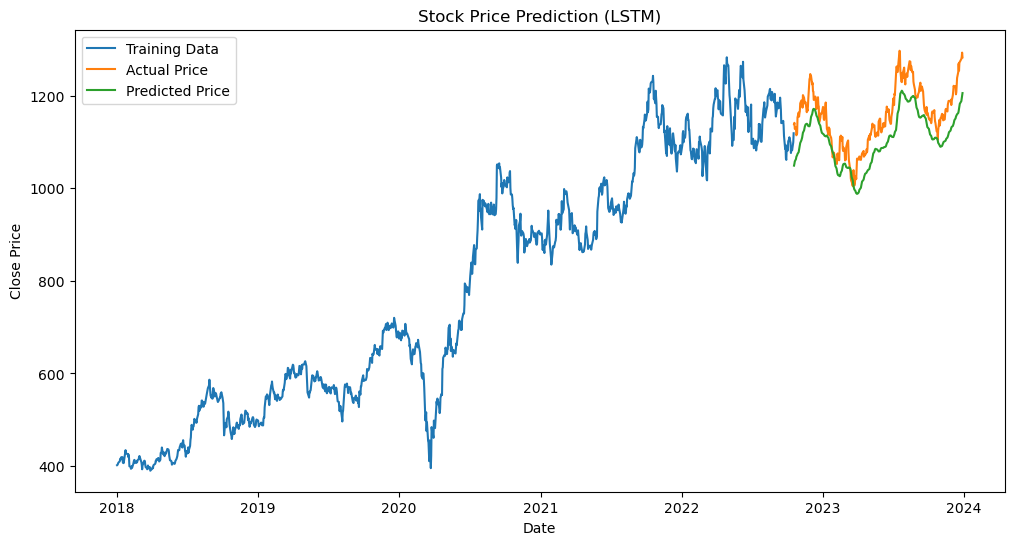

In [3]:
# Stock Price Prediction using LSTM

# Install required libraries (uncomment if needed)
# !pip install yfinance tensorflow scikit-learn matplotlib pandas

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# -------------------------
# 1. Download Stock Data
# -------------------------
# Example: Reliance Industries (India) from 2018 to 2023
df = yf.download("RELIANCE.NS", start="2018-01-01", end="2023-12-31")

# Check available columns
print("Columns in dataset:", df.columns)

# -------------------------
# 2. Preprocessing
# -------------------------
# Use 'Close' column only, drop NaN if any
data = df[['Close']].dropna()

# Convert to numpy array
dataset = data.values

# Scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Training Data (80%)
training_data_len = int(np.ceil(len(dataset) * 0.8))

train_data = scaled_data[0:int(training_data_len), :]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape for LSTM [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# -------------------------
# 3. Build LSTM Model
# -------------------------
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

# -------------------------
# 4. Prepare Test Data
# -------------------------
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# -------------------------
# 5. Visualization
# -------------------------
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.title('Stock Price Prediction (LSTM)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close']], label='Actual Price')
plt.plot(valid[['Predictions']], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
